In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import tensorflow as tf

### 데이터 전처리
1. 데이터 규모 확인<br>2. 320개 주어진 csv 파일 shuffle하여 100개로 나눠 합침. 파일 규모가 너무 크기 때문에 csv.gz 파일로 압축해서 활용 <br>3. PIL 라이브러리 활용해 64*64 이미지로 convert 하여 그림으로 나타냄.<br>4. one_hot_coding 기법 이용: 324개의 y_label을 np.eye(324)를 사용해서 원-핫인코딩함. <br>


### CNN 학습
1. Tensorflow 활용하려 했으나, tensorflow-gpu 버전과 cuda 버전이 맞지 않는 관계로 계속 해결할 수 없는 문제 발생함.<br>
2. Cuda 문제로 keras또한 사용할 수 없어서 고민 끝에 "밑바닥부터 시작하는 딥러닝" 서적 참고하여 Deep-convnet 구현 <br>
3. 네트워크 구성은 아래와 같음 <br>**** conv - relu - conv - relu - pool - <br> conv - relu - conv - relu - pool - <br> conv - relu - conv - relu - pool - <br>affine - relu - dropout - affine - dropout - softmax****<br>hidden_size = 50 

### Shuffle Data

In [25]:
import os
cwd = os.getcwd()
file_path = os.path.join(cwd,"data")
files = os.listdir(file_path)
word_category = [f.split(".")[0] for f in files]
chunk_size = 100

for index, word in enumerate(word_category):
    df = pd.read_csv(os.path.join(file_path, str(word+".csv")))
    for k in range(chunk_size):
        filename = 'train_{}.csv'.format(k)
        chunk = df[df.cv == k]
        chunk = chunk.drop(['key_id'], axis=1)
        
for k in tqdm(range(chunk_size)):
    filename = 'train_{}.csv'.format(k)
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        df['rnd'] = np.random.rand(len(df))
        df = df.sort_values(by='rnd').drop('rnd', axis=1)
        df.to_csv(filename + '.gz', compression='gzip', index=False)
        os.remove(filename)                     

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


AttributeError: 'DataFrame' object has no attribute 'cv'

In [4]:
for k in tqdm(range(chunk_size)):
    filename = 'train_{}.csv'.format(k)
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        df['rnd'] = np.random.rand(len(df))
        df = df.sort_values(by='rnd').drop('rnd', axis=1)
        df.to_csv(filename + '.gz', compression='gzip', index=False)
        os.remove(filename)

 40%|███████████████████████████████▏                                              | 40/100 [18:31<2:02:29, 122.48s/it]C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 42%|████████████████████████████████▊                                             | 42/100 [22:40<1:59:30, 123.64s/it]C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 44%|██████████████████████████████████▎                                           | 44/100 [26:53<1:56:44, 125.07s/it]C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on

(457270, 7)


In [9]:
import os
cwd = os.getcwd()
file_path = os.path.join(cwd,"data")
files = os.listdir(file_path)
word_category = [f.split(".")[0] for f in files]
chunk_size = 100

### 그림으로 10개 train데이터 10개만 추출해서 나타내기

IndexError: index 11 is out of bounds for axis 0 with size 11

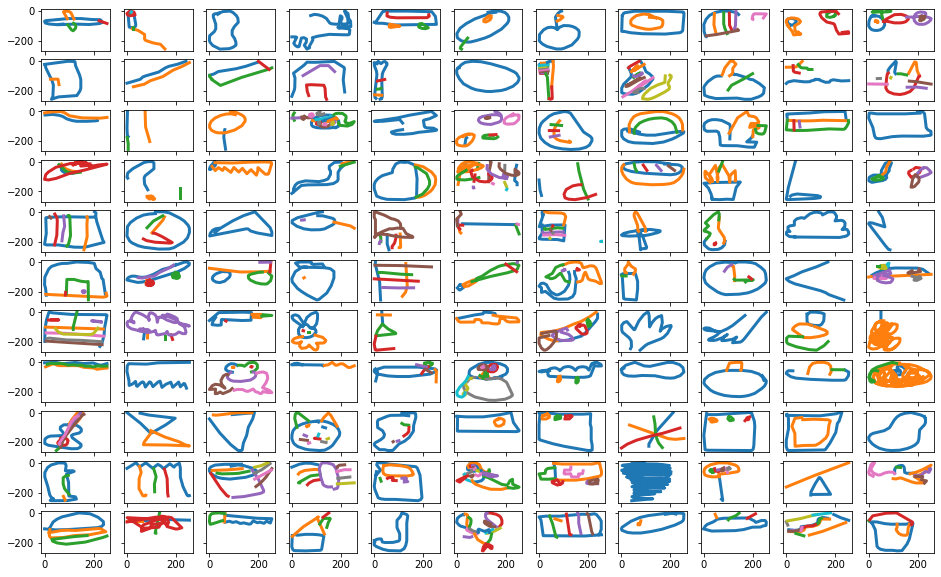

In [22]:
df2 = pd.read_csv("train_1.csv.gz", header=None)
df2[1] = df2[1].apply(ast.literal_eval)
n = 11
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(16, 10))
for i, drawing in enumerate(df2[1]):
    ax = axs[i // n, i % n]
    for x, y in drawing:
        ax.plot(x, -np.array(y), lw=3)
plt.show();

In [27]:
df2.values[58]

array(['US',
       list([[[233, 221, 137, 75, 62, 71, 133, 219, 180, 154, 91, 40, 114, 153, 217, 246, 149, 117, 86, 44, 125, 245, 186, 111, 71, 11, 95, 128, 184, 209, 107, 50, 106, 190, 139, 84, 58, 21, 71, 108, 180, 203, 139, 83, 58, 30, 130, 215, 240, 216, 157, 90, 63, 41, 131, 241, 168, 131, 61, 11, 91, 123, 155, 225, 159, 123, 53, 26, 4, 121, 175, 214, 140, 68, 35, 12, 1, 120, 176, 223, 90, 45, 29, 151, 225, 96, 40, 27, 24, 28, 126, 180, 212, 67, 38, 118, 210, 38, 127, 176, 202, 200, 106, 48, 146, 235, 197, 128, 91, 33, 20, 136, 194, 102, 19, 58, 117, 175, 210, 120, 30, 59, 115, 148, 180, 234, 116, 45, 18, 97, 168, 232, 171, 96, 28, 125, 206, 188, 117, 45, 17, 90, 180, 79, 30, 89, 171, 119, 92, 40, 125, 158, 208, 227, 195, 102, 61, 150, 210, 247, 166, 95, 65, 42, 61, 140, 227, 173, 101, 69, 37, 44, 152, 228, 122, 88, 49, 49, 138, 255, 244, 212, 149, 104, 30, 132, 192, 217, 162, 78, 45, 24, 120, 159, 229, 169, 51, 31, 24, 133, 205, 246, 232, 159, 41, 26, 88, 199, 241, 138, 93, 13, 

In [16]:
file = os.path.join("test_simplified.csv")

In [20]:
df= pd.read_csv(r"C:\workspace\xPython\Machine Learning\Kaggle_Quick_Draw\data\test_simplified.csv", header=None)

### y_label 원핫-인코딩 하기

In [29]:
one_hot_encoding = np.eye(len(word_category))
category_y_label = dict()
index = 0
for i in word_category:
    category_y_label[i]=one_hot_encoding[index]
    index+=1
    
#raw_data 안에 df 로 읽은 데이터 쌓아두기, 단 recognized 가 True일때만. 
raw_data = []
for k in range(1, chunk_size):
    file_name = "train_{}.csv.gz".format(k)
    df = pd.read_csv(file_name)
#     df.columns=['countrycode','drawing','recognized','timestamp','word','index']
    df[df.columns[8]]=category_y_label[df.columns[4]]  #4번째 column이 바로 'word'가 담긴 부분 
    print("train_{}.csv.gz one_hot_encoding Done!!")

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [70]:
file_name = "train_{}.csv.gz".format("0")
df = pd.read_csv(file_name)
# df.columns=['countrycode','drawing','recognized','timestamp','word','word_index','file_index']
df.drop(df.columns[6], axis=1)

In [71]:
df

,0,1,2,3,4,5,6,7
0,0,US,"[[[145, 131, 113, 71, 48, 21, 3, 0, 4, 16, 35,...",True,47:51.0,alarm clock,1,0
1,1,US,"[[[132, 78, 48, 38, 41, 49, 71, 148, 144, 135,...",False,2017-03-01 01:29:38.139920,toe,311,0
2,2,US,"[[[201, 195, 196, 194, 179, 159, 134, 114, 97,...",True,2017-01-26 23:17:44.077860,banana,12,0
3,3,US,"[[[24, 17, 0, 74, 148, 207, 255, 189, 148, 53,...",True,2017-04-03 16:38:18.909000,harp,137,0
4,4,US,"[[[187, 132, 118, 80, 63, 47, 29, 11, 3, 0, 0,...",True,24:16.7,alarm clock,1,0
5,5,US,"[[[10, 80, 144], [47, 53, 55]], [[0, 154, 164,...",True,2017-03-15 21:02:21.256560,arm,8,0
6,6,AU,"[[[0, 10, 22, 26, 32, 43, 47, 52, 59, 97, 113,...",True,2017-03-07 23:39:08.386920,squiggle,277,0
7,7,CA,"[[[0, 110, 219, 247, 255, 213, 149, 117, 58, 5...",True,2017-03-16 03:18:22.888860,map,176,0
8,8,GB,"[[[12, 9, 0, 0, 10, 36, 105, 87, 87, 91, 94, 1...",False,2017-03-04 15:00:51.890320,pants,206,0
9,9,MY,"[[[71, 45, 24, 16, 5, 2, 5, 18, 40, 77, 90, 10...",True,07:17.2,alarm clock,1,0
